# ETL Process for Global Inflation Dashboard Project 

## Inflation data

#### What is Inflation?

Inflation is the rate at which the general level of prices for goods and services rises, leading to a decrease in the purchasing power of a currency. Essentially, it means that over time, you will be able to buy less with the same amount of money.

#### Key Concepts of Inflation
1. Purchasing Power:

- As prices increase, the purchasing power of money decreases. For example, if the inflation rate is 2% per year, a $1 item today will cost $1.02 in one year.

2. Measurement:

- Inflation is typically measured by the Consumer Price Index (CPI) or the Producer Price Index (PPI).
- CPI tracks the cost of a basket of consumer goods and services over time.
- PPI measures the average changes in selling prices received by domestic producers for their output.

3. Types of Inflation:

- Demand-Pull Inflation: Occurs when the demand for goods and services exceeds their supply, driving up prices.
- Cost-Push Inflation: Happens when the costs of production increase (e.g., higher wages, raw materials), leading producers to raise prices to maintain profit margins.
- Built-In Inflation: Also known as wage-price inflation, where businesses increase prices to compensate for rising wages, and workers demand higher wages to keep up with increased living costs, creating a feedback loop.

4. Hyperinflation:

- Extremely high and typically accelerating inflation. This can lead to the collapse of a currency and a significant loss of confidence in the economy.

5. Deflation:

- The opposite of inflation, where the general price level of goods and services decreases. While it might seem beneficial, deflation can lead to decreased economic activity as consumers delay purchases in anticipation of lower prices.

#### Causes of Inflation

1. Monetary Factors:

- Increase in the money supply without a corresponding increase in economic output can lead to inflation. This is often due to central banks printing more money or reducing interest rates.

2. Demand-Side Factors:

- Increased consumer spending, higher government expenditure, and increased investment can drive up demand for goods and services, leading to inflation.

3. Supply-Side Factors:

- Increased production costs, such as rising wages or raw material prices, can cause businesses to raise prices, resulting in cost-push inflation.

4. Expectations:

- If people expect inflation to rise, they may demand higher wages and spend more quickly, which can contribute to higher inflation.

#### Effects of Inflation

1. Decreased Purchasing Power:

- Inflation erodes the value of money, reducing the purchasing power of consumers.

2. Impact on Savings and Investments:

- Inflation can erode the value of savings if the return on investments is lower than the inflation rate. Conversely, it can benefit borrowers as the real value of debt decreases over time.

3. Menu Costs:

- Businesses incur costs when they have to change prices frequently due to inflation (e.g., reprinting menus, updating systems).

4. Uncertainty:

- High and unpredictable inflation can create uncertainty in the economy, leading to reduced investment and economic growth.

#### Controlling Inflation

1. Monetary Policy:

- Central banks use tools like interest rates and control of the money supply to manage inflation. Raising interest rates can help reduce inflation by decreasing spending and borrowing.

2. Fiscal Policy:

- Governments can use taxation and spending policies to influence the economy. Reducing government spending or increasing taxes can help curb inflation by reducing overall demand.

3. Supply-Side Policies:

- Measures to improve productivity and efficiency in the economy can help control inflation by reducing production costs.

#### Examples

1. Hyperinflation in Zimbabwe:

- In the late 2000s, Zimbabwe experienced hyperinflation, with prices doubling every day at its peak. This was due to excessive printing of money and loss of confidence in the currency.

2. Moderate Inflation in Developed Economies:

- Most developed economies aim for a moderate inflation rate of around 2% per year, which is considered healthy for economic growth. For instance, the Federal Reserve in the United States targets a 2% inflation rate as part of its monetary policy.

#### Conclusion

Inflation is a critical economic concept that affects everyone's daily life. Understanding its causes, effects, and how it is measured can help individuals and policymakers make informed decisions. Proper management of inflation through monetary and fiscal policies is essential for maintaining economic stability and growth.

---
What follows here is an ETL process for the Global Inflation Dashboard Project.

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)

In [3]:
# Read inflation data into Pandas dataframe
inflation_df = pd.read_csv('Dataset/global_inflation_data_kaggle_raw.csv')
inflation_df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [4]:
# Get a brief summary of the inflation data
inflation_df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,140.000000,144.000000,145.000000,145.000000,145.000000,145.000000,145.000000,147.000000,147.000000,147.000000,...,194.000000,194.000000,195.000000,195.000000,195.000000,194.000000,194.000000,194.000000,192.000000,191.000000
mean,21.757143,17.796528,17.029655,19.177241,26.979310,103.215172,25.262069,111.294558,58.635374,101.246259,...,4.116186,6.594742,7.656821,339.688359,107.294872,19.832680,16.577629,13.616031,13.736458,9.309424
std,33.656118,18.992691,22.797064,34.806824,111.889811,975.748316,86.931210,1081.094434,400.370989,679.792142,...,10.763149,31.096216,34.954954,4681.227548,1425.256254,173.722612,117.154632,25.282229,39.667874,25.195589
min,-7.300000,0.000000,-0.900000,-8.500000,-7.400000,-16.000000,-17.600000,-31.200000,-13.000000,-9.600000,...,-3.800000,-5.600000,-13.300000,-44.400000,-3.200000,-2.600000,-3.000000,-3.200000,-0.800000,1.200000
25%,9.550000,8.600000,6.100000,5.000000,3.800000,2.800000,1.800000,2.150000,2.550000,3.350000,...,0.100000,0.100000,1.150000,1.300000,0.800000,0.400000,1.925000,5.500000,4.000000,2.800000
50%,13.850000,12.500000,10.300000,8.700000,8.000000,7.100000,5.800000,5.900000,6.800000,6.900000,...,1.500000,1.500000,2.400000,2.500000,2.200000,1.900000,3.500000,8.100000,5.800000,4.000000
75%,20.525000,19.800000,16.700000,16.000000,17.100000,16.800000,18.200000,16.650000,17.800000,16.700000,...,4.800000,5.125000,5.200000,4.300000,4.000000,4.575000,5.975000,11.975000,9.925000,5.800000
max,316.600000,116.800000,123.600000,275.600000,1281.300000,11749.600000,885.200000,13109.500000,4775.200000,7428.700000,...,121.700000,346.100000,438.100000,65374.100000,19906.000000,2355.100000,1588.500000,193.400000,360.000000,222.400000


In [5]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   1980            140 non-null    float64
 3   1981            144 non-null    float64
 4   1982            145 non-null    float64
 5   1983            145 non-null    float64
 6   1984            145 non-null    float64
 7   1985            145 non-null    float64
 8   1986            145 non-null    float64
 9   1987            147 non-null    float64
 10  1988            147 non-null    float64
 11  1989            147 non-null    float64
 12  1990            150 non-null    float64
 13  1991            155 non-null    float64
 14  1992            158 non-null    float64
 15  1993            169 non-null    float64
 16  1994            171 non-null    float64
 17  1995            172 non-null    flo

In [6]:
# Get the inflation_df columns
inflation_df_columns_list = inflation_df.columns
inflation_df_columns_list

Index(['country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [7]:
# Melt the DataFrame to long format
time_series_df = pd.melt(inflation_df, 
                         id_vars=['country_name', 'indicator_name'], 
                         var_name='year', 
                         value_name='inflation_rate')

# Convert year to integer
time_series_df['year'] = time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
time_series_df['id'] = time_series_df['country_name'] + '_' + time_series_df['year'].astype(str)

time_series_df.rename(columns={
 'country_name': 'Country',
 'indicator_name': 'Indicator',
 'year': 'Year',
 'inflation_rate': 'Inflation_Rate',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
time_series_df.head()


,Country,Indicator,Year,Inflation_Rate,ID
0,Afghanistan,Annual average inflation (consumer prices) rate,1980,13.4,Afghanistan_1980
1,Albania,Annual average inflation (consumer prices) rate,1980,NaN,Albania_1980
2,Algeria,Annual average inflation (consumer prices) rate,1980,9.7,Algeria_1980
3,Andorra,Annual average inflation (consumer prices) rate,1980,NaN,Andorra_1980
4,Angola,Annual average inflation (consumer prices) rate,1980,46.7,Angola_1980


In [8]:
# Export time_series_df as CSV files.
time_series_df.to_csv("cleaned_data/inflation.csv", index=False)


## GDP data

#### GDP
=
𝐶
+
𝐼
+
𝐺
+
(
𝑋
−
𝑀
)
GDP=C+I+G+(X−M)

- C = Consumption

- I = Investment

- G = Government spending

- X = Exports

- M = Imports

In [9]:
# Read inflation data into Pandas dataframe
gdp_df = pd.read_csv('Dataset/gdp_kaggle_raw.csv')
gdp_df.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [10]:
# Get a brief summary of the inflation data
gdp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,1.280000e+02,1.340000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.480000e+02,1.510000e+02,1.540000e+02,1.590000e+02,1.590000e+02,...,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.420000e+02,0.0
mean,7.208990e+10,7.249579e+10,7.560104e+10,8.153273e+10,8.955109e+10,9.092983e+10,1.011853e+11,1.049722e+11,1.100411e+11,1.216833e+11,...,2.405010e+12,2.482543e+12,2.553374e+12,2.407493e+12,2.447400e+12,2.620694e+12,2.786905e+12,2.864964e+12,2.892666e+12,NaN
std,2.175567e+11,2.218112e+11,2.356451e+11,2.535097e+11,2.772362e+11,2.911551e+11,3.187828e+11,3.371659e+11,3.590818e+11,3.952167e+11,...,8.162961e+12,8.388441e+12,8.616240e+12,8.171350e+12,8.321991e+12,8.852537e+12,9.425221e+12,9.620595e+12,9.530218e+12,NaN
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07,NaN
25%,4.930171e+08,5.007338e+08,5.317365e+08,5.161478e+08,5.425784e+08,5.863716e+08,6.380995e+08,6.238584e+08,6.440071e+08,6.834820e+08,...,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.204996e+10,NaN
50%,2.661047e+09,2.966849e+09,2.814319e+09,3.540403e+09,3.405333e+09,3.038595e+09,3.170500e+09,3.377453e+09,3.941700e+09,4.485778e+09,...,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.212830e+10,NaN
75%,2.218450e+10,2.956713e+10,2.929229e+10,3.395604e+10,3.122632e+10,2.719410e+10,2.893661e+10,3.037676e+10,3.340376e+10,3.745799e+10,...,5.524837e+11,5.447092e+11,5.456266e+11,5.051038e+11,5.261238e+11,5.666712e+11,5.634445e+11,5.972806e+11,7.441747e+11,NaN
max,1.387318e+12,1.443856e+12,1.545481e+12,1.666138e+12,1.824277e+12,1.987340e+12,2.156806e+12,2.294908e+12,2.476959e+12,2.732048e+12,...,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13,NaN


In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Code          266 non-null    object 
 2   1960          128 non-null    float64
 3   1961          134 non-null    float64
 4   1962          137 non-null    float64
 5   1963          137 non-null    float64
 6   1964          137 non-null    float64
 7   1965          148 non-null    float64
 8   1966          151 non-null    float64
 9   1967          154 non-null    float64
 10  1968          159 non-null    float64
 11  1969          159 non-null    float64
 12  1970          168 non-null    float64
 13  1971          171 non-null    float64
 14  1972          171 non-null    float64
 15  1973          171 non-null    float64
 16  1974          172 non-null    float64
 17  1975          174 non-null    float64
 18  1976          175 non-null    

In [12]:
# Get the gdp_df columns
gdp_df_columns_list = gdp_df.columns
gdp_df_columns_list

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [14]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_df.columns if col.isdigit()]
id_vars = ['Country Name', 'Code']

# Melt the DataFrame to long format
gdp_time_series_df = pd.melt(gdp_df, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='gdp')

# Convert year to integer
gdp_time_series_df['year'] = gdp_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_time_series_df['id'] = gdp_time_series_df['Country Name'] + '_' + gdp_time_series_df['year'].astype(str)

gdp_time_series_df.rename(columns={
 'Country Name': 'Country',
 'year': 'Year',
 'gdp': 'GDP',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
print(gdp_time_series_df.head())

                       Country Code  Year           GDP  \
0                        Aruba  ABW  1960           NaN   
1  Africa Eastern and Southern  AFE  1960  1.931311e+10   
2                  Afghanistan  AFG  1960  5.377778e+08   
3   Africa Western and Central  AFW  1960  1.040428e+10   
4                       Angola  AGO  1960           NaN   

                                 ID  
0                        Aruba_1960  
1  Africa Eastern and Southern_1960  
2                  Afghanistan_1960  
3   Africa Western and Central_1960  
4                       Angola_1960  


In [15]:
# Export gdp_time_series_df as CSV files.
gdp_time_series_df.to_csv("cleaned_data/gdp.csv", index=False)

## GDP growth per capita data

#### GDP per capita
=
GDP per Capita= 
GDP / Population


In [16]:
# Read gdp growth per capita data into Pandas dataframe
gdp_growth_df = pd.read_csv('Dataset/gdp_per_capita_growth_kaggle_raw.csv')
gdp_growth_df.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.865105,3.592223,-0.290534,5.129657,1.587869,1.519821,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.769509,1.505305,1.203260,0.187860,-0.674533,-0.144710,-0.185406,-0.544414,-5.403820,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.974865,1.974166,-0.665291,-1.622857,-0.541416,0.064764,-1.194900,1.535637,-4.575032,NaN
3,Africa Western and Central,AFW,NaN,-0.232405,1.602299,4.990675,3.12468,1.783947,-3.946431,-11.557321,...,2.315175,3.260886,3.096784,0.007402,-2.533562,-0.390665,0.241531,0.492953,-3.453976,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.706519,1.291994,1.219881,-2.468737,-5.816188,-3.409983,-5.162112,-3.795608,-8.396241,NaN


In [17]:
gdp_growth_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,0.0,119.000000,124.000000,124.000000,124.000000,124.000000,132.000000,136.000000,138.000000,142.000000,...,253.000000,253.000000,255.000000,254.000000,254.000000,254.000000,253.000000,251.000000,244.000000,0.0
mean,NaN,1.265832,2.717553,2.611405,4.001137,2.965614,2.346891,1.879621,3.686990,4.584436,...,1.823515,1.832804,1.951132,1.386062,1.794568,1.916788,1.828986,1.534935,-5.797238,NaN
std,NaN,5.676197,4.469364,4.998234,4.349242,4.336827,4.314371,6.965940,7.254843,4.643365,...,9.052478,4.626217,3.442476,4.465341,3.663534,3.538378,2.980404,2.925050,7.167678,NaN
min,NaN,-26.527644,-21.644507,-14.574477,-14.092751,-15.204696,-10.653985,-17.553376,-6.758929,-9.249391,...,-47.590601,-36.556920,-24.498011,-29.827145,-13.020430,-9.167725,-19.821379,-11.645791,-54.641447,NaN
25%,NaN,-0.410944,1.017317,0.552989,1.831906,0.382805,-0.537042,-0.671153,0.584387,2.040628,...,-0.195108,0.163871,0.556265,0.106375,0.027065,0.492579,0.485180,0.053584,-8.057641,NaN
50%,NaN,1.977003,2.322061,3.059142,4.347052,3.035230,2.408980,1.836612,3.560811,4.278922,...,1.424974,1.888643,1.841026,1.651083,1.772708,1.941500,1.899148,1.598970,-4.752616,NaN
75%,NaN,4.152542,4.772294,4.804380,5.968369,4.959529,4.934897,4.223501,4.979455,6.735885,...,3.745866,3.650819,3.555055,3.418883,3.385600,3.709334,3.650746,3.150985,-2.495986,NaN
max,NaN,13.661590,20.599898,31.010546,23.947150,14.197889,15.951350,61.658941,76.675456,21.876232,...,121.779472,29.690999,25.566139,23.999093,28.273852,24.976038,13.446087,17.211410,42.789300,NaN


In [18]:
gdp_growth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Code          266 non-null    object 
 2   1960          0 non-null      float64
 3   1961          119 non-null    float64
 4   1962          124 non-null    float64
 5   1963          124 non-null    float64
 6   1964          124 non-null    float64
 7   1965          124 non-null    float64
 8   1966          132 non-null    float64
 9   1967          136 non-null    float64
 10  1968          138 non-null    float64
 11  1969          142 non-null    float64
 12  1970          139 non-null    float64
 13  1971          153 non-null    float64
 14  1972          153 non-null    float64
 15  1973          153 non-null    float64
 16  1974          153 non-null    float64
 17  1975          155 non-null    float64
 18  1976          159 non-null    

In [19]:
# Get the gdp_growth_df columns
gdp_growth_df_columns_list = gdp_growth_df.columns
gdp_growth_df_columns_list

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [20]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_growth_df.columns if col.isdigit()]
id_vars = ['Country Name', 'Code']

# Melt the DataFrame to long format
gdp_growth_time_series_df = pd.melt(gdp_growth_df, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='gdp_growth')

# Convert year to integer
gdp_growth_time_series_df['year'] = gdp_growth_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_growth_time_series_df['id'] = gdp_growth_time_series_df['Country Name'] + '_' + gdp_growth_time_series_df['year'].astype(str)

gdp_growth_time_series_df.rename(columns={
 'Country Name': 'Country',
 'year': 'Year',
 'gdp_growth': 'GDP_Growth',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
print(gdp_growth_time_series_df.head())

                       Country Code  Year  GDP_Growth  \
0                        Aruba  ABW  1960         NaN   
1  Africa Eastern and Southern  AFE  1960         NaN   
2                  Afghanistan  AFG  1960         NaN   
3   Africa Western and Central  AFW  1960         NaN   
4                       Angola  AGO  1960         NaN   

                                 ID  
0                        Aruba_1960  
1  Africa Eastern and Southern_1960  
2                  Afghanistan_1960  
3   Africa Western and Central_1960  
4                       Angola_1960  


In [21]:
# Export gdp_time_series_df as CSV files.
gdp_growth_time_series_df.to_csv("cleaned_data/gdp_growth.csv", index=False)

## GDP per capita data

`GDP per Capita` = 
(`GDP per Capita in Current Period` − `GDP per Capita in Previous Period`) / (`GDP per Capita in Previous Period`) * 100
​


In [22]:
# Read gdp per capita data into Pandas dataframe
gdp_percapita_df = pd.read_csv('Dataset/gdp_per_capita_kaggle_raw.csv')
gdp_percapita_df.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [23]:
gdp_percapita_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,128.000000,134.000000,137.000000,137.000000,137.000000,148.000000,151.000000,154.000000,159.000000,159.000000,...,257.000000,258.000000,258.000000,257.000000,256.000000,256.000000,256.000000,253.000000,242.000000,0.0
mean,482.725314,491.115624,513.103203,544.566319,590.805091,654.822693,710.326019,725.993794,742.735017,804.348363,...,16120.560273,16659.720923,16964.258521,15359.980640,15524.456868,16308.827347,17288.675629,17144.609643,14354.539354,NaN
std,626.040168,639.846845,669.060194,708.534576,774.925619,864.084238,935.096499,966.070357,994.686146,1071.190027,...,23550.237516,25086.503778,25768.767745,23277.449054,23522.761455,24336.089896,25989.582741,25903.117527,21898.003148,NaN
min,40.537211,26.308357,26.985920,28.449430,20.035487,16.596459,12.802812,12.915456,20.418277,20.700642,...,252.358871,256.975653,274.857836,305.549653,260.565221,253.826354,238.783467,228.213589,238.990726,NaN
25%,104.407303,109.078291,114.581807,121.762130,123.645925,138.512407,145.574804,155.377495,154.043379,160.648668,...,1965.118485,2092.400443,2156.756410,2049.851666,2093.428898,2101.842601,2202.590063,2246.625578,1936.184305,NaN
50%,197.897848,197.158225,203.437370,213.896759,234.633358,249.112369,262.312268,252.705895,281.925786,293.387951,...,6528.971775,6797.232338,6655.280874,6175.876030,5921.203011,6336.133639,6962.584227,6853.693411,5606.538092,NaN
75%,478.826988,475.192902,520.206131,583.411562,629.591526,683.030310,780.032061,750.374486,766.275654,826.348388,...,19870.801212,20140.951340,20148.318040,18028.973431,18356.000551,19689.335613,19952.381716,19575.768481,15650.348914,NaN
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4443.452338,4571.155742,4336.426587,4695.923390,5032.144743,...,157520.219427,177673.745368,189432.370013,167313.266280,170028.655718,171253.964254,185978.609251,189487.147128,173688.189360,NaN


In [24]:
gdp_percapita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Code          266 non-null    object 
 2   1960          128 non-null    float64
 3   1961          134 non-null    float64
 4   1962          137 non-null    float64
 5   1963          137 non-null    float64
 6   1964          137 non-null    float64
 7   1965          148 non-null    float64
 8   1966          151 non-null    float64
 9   1967          154 non-null    float64
 10  1968          159 non-null    float64
 11  1969          159 non-null    float64
 12  1970          168 non-null    float64
 13  1971          171 non-null    float64
 14  1972          171 non-null    float64
 15  1973          171 non-null    float64
 16  1974          172 non-null    float64
 17  1975          174 non-null    float64
 18  1976          175 non-null    

In [25]:
# Get the gdp_percapita_df columns
gdp_percapita_df_columns_list = gdp_percapita_df.columns
gdp_percapita_df_columns_list

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [26]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_percapita_df.columns if col.isdigit()]
id_vars = ['Country Name', 'Code']

# Melt the DataFrame to long format
gdp_percapita_time_series_df = pd.melt(gdp_percapita_df, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='gdp_per_capita')

# Convert year to integer
gdp_percapita_time_series_df['year'] = gdp_percapita_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_percapita_time_series_df['id'] = gdp_percapita_time_series_df['Country Name'] + '_' + gdp_percapita_time_series_df['year'].astype(str)

gdp_percapita_time_series_df.rename(columns={
 'Country Name': 'Country',
 'year': 'Year',
 'gdp_per_capita': 'GDP_per_Capita',
 'id': 'ID'
}, inplace=True)


# Check the transformed DataFrame
print(gdp_percapita_time_series_df.head())

# Export gdp_time_series_df as CSV files.
gdp_percapita_time_series_df.to_csv("cleaned_data/gdp_percapita.csv", index=False)

                       Country Code  Year  GDP_per_Capita  \
0                        Aruba  ABW  1960             NaN   
1  Africa Eastern and Southern  AFE  1960      147.612227   
2                  Afghanistan  AFG  1960       59.773234   
3   Africa Western and Central  AFW  1960      107.932233   
4                       Angola  AGO  1960             NaN   

                                 ID  
0                        Aruba_1960  
1  Africa Eastern and Southern_1960  
2                  Afghanistan_1960  
3   Africa Western and Central_1960  
4                       Angola_1960  


## GDP ppp data

#### Calculation of GDP PPP - purchase power parity

The calculation of `GDP PPP` involves the following steps:

1. Identify a Basket of Goods:

- Select a representative basket of goods and services for comparison.

2. Calculate the Price of the Basket:

- Determine the cost of the basket in each country’s local currency.

3. Determine the PPP Exchange Rate:

- Calculate the PPP exchange rate by comparing the price of the basket in each country.

4. Adjust GDP:

- Adjust the nominal GDP using the PPP exchange rate to obtain GDP PPP.

In [27]:
# Read gdp ppp data into Pandas dataframe
gdp_ppp_df = pd.read_csv('Dataset/gdp_ppp_kaggle_raw.csv')
gdp_ppp_df.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442856e+09,3.799467e+09,3.816822e+09,3.893071e+09,3.941354e+09,4.098240e+09,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.772679e+12,1.893539e+12,2.025402e+12,2.098286e+12,2.212573e+12,2.319151e+12,2.438518e+12,2.536280e+12,2.495345e+12,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.966700e+10,6.503984e+10,6.905834e+10,7.183170e+10,7.009796e+10,7.471192e+10,7.741557e+10,8.187980e+10,8.091834e+10,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.396677e+12,1.526772e+12,1.645122e+12,1.662297e+12,1.678674e+12,1.744087e+12,1.841811e+12,1.937451e+12,1.946297e+12,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.861242e+11,1.998656e+11,2.203648e+11,2.046036e+11,2.048747e+11,2.179873e+11,2.187486e+11,2.212628e+11,2.118373e+11,NaN


In [28]:
gdp_ppp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.420000e+02,2.440000e+02,2.430000e+02,2.430000e+02,2.420000e+02,2.420000e+02,2.410000e+02,2.400000e+02,2.380000e+02,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.704909e+12,3.865470e+12,4.032503e+12,4.116129e+12,4.307111e+12,4.547134e+12,4.857924e+12,5.100159e+12,5.082028e+12,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.125558e+13,1.179273e+13,1.227292e+13,1.255441e+13,1.310583e+13,1.382732e+13,1.474478e+13,1.544970e+13,1.534652e+13,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.314065e+07,3.526565e+07,3.640218e+07,4.010884e+07,4.175965e+07,4.428655e+07,4.648360e+07,5.192935e+07,5.486763e+07,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.177589e+10,2.296467e+10,2.418240e+10,2.486117e+10,2.490149e+10,2.732149e+10,2.877470e+10,3.013907e+10,3.063161e+10,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.144681e+11,1.185771e+11,1.190646e+11,1.210239e+11,1.289073e+11,1.340788e+11,1.446313e+11,1.535131e+11,1.600442e+11,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.155848e+12,1.088341e+12,1.140403e+12,1.094342e+12,1.145318e+12,1.202053e+12,1.286524e+12,1.423722e+12,1.563385e+12,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000450e+14,1.049635e+14,1.089108e+14,1.112426e+14,1.156946e+14,1.218901e+14,1.293163e+14,1.348289e+14,1.329991e+14,NaN


In [29]:
gdp_ppp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Code          266 non-null    object 
 2   1960          0 non-null      float64
 3   1961          0 non-null      float64
 4   1962          0 non-null      float64
 5   1963          0 non-null      float64
 6   1964          0 non-null      float64
 7   1965          0 non-null      float64
 8   1966          0 non-null      float64
 9   1967          0 non-null      float64
 10  1968          0 non-null      float64
 11  1969          0 non-null      float64
 12  1970          0 non-null      float64
 13  1971          0 non-null      float64
 14  1972          0 non-null      float64
 15  1973          0 non-null      float64
 16  1974          0 non-null      float64
 17  1975          0 non-null      float64
 18  1976          0 non-null      

In [30]:
# Get the gdp_ppp_df columns
gdp_ppp_df_columns_list = gdp_ppp_df.columns
gdp_ppp_df_columns_list

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [31]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_ppp_df.columns if col.isdigit()]
id_vars = ['Country Name', 'Code']

# Melt the DataFrame to long format
gdp_ppp_time_series_df = pd.melt(gdp_ppp_df, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='gdp_ppp')

# Convert year to integer
gdp_ppp_time_series_df['year'] = gdp_ppp_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_ppp_time_series_df['id'] = gdp_ppp_time_series_df['Country Name'] + '_' + gdp_ppp_time_series_df['year'].astype(str)

gdp_ppp_time_series_df.rename(columns={
 'Country Name': 'Country',
 'year': 'Year',
 'gdp_ppp': 'GDP_PPP',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
print(gdp_ppp_time_series_df.head())

# Export gdp_time_series_df as CSV files.
gdp_ppp_time_series_df.to_csv("cleaned_data/gdp_ppp.csv", index=False)

                       Country Code  Year  GDP_PPP  \
0                        Aruba  ABW  1960      NaN   
1  Africa Eastern and Southern  AFE  1960      NaN   
2                  Afghanistan  AFG  1960      NaN   
3   Africa Western and Central  AFW  1960      NaN   
4                       Angola  AGO  1960      NaN   

                                 ID  
0                        Aruba_1960  
1  Africa Eastern and Southern_1960  
2                  Afghanistan_1960  
3   Africa Western and Central_1960  
4                       Angola_1960  


## GDP ppp per capita data

`GDP PPP per capita` is the gross domestic product (GDP) of a country adjusted for purchasing power parity (PPP) divided by its population. It provides a per-person measure of economic output that accounts for differences in price levels across countries, offering a more accurate comparison of living standards and economic well-being between nations.

Formula:
GDP PPP per Capita = (GDP PPP) / Population

Use:

- Comparing Living Standards: Offers a fairer comparison of average income and standard of living across countries.
- Economic Analysis: Helps assess economic productivity and well-being on a per-person basis, adjusted for cost of living differences.

In [32]:
# Read gdp ppp per capita data into Pandas dataframe
gdp_ppp_percapita_df = pd.read_csv('Dataset/gdp_ppp_per_capita_kaggle_raw.csv')
gdp_ppp_percapita_df.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33567.550017,36829.032774,36779.429429,37311.750320,37585.025079,38897.122666,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3237.870658,3365.682977,3503.699383,3533.230819,3627.294348,3702.390685,3791.875407,3842.578511,3684.562623,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2078.648615,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4242.114489,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6445.432873,NaN


In [33]:
gdp_ppp_percapita_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.000000,244.000000,243.000000,243.000000,242.000000,242.000000,241.000000,240.000000,238.000000,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18328.390712,18751.443091,19168.560583,18814.458040,19403.458591,20370.527037,21163.156817,21637.501483,20327.585530,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20835.907707,21334.683819,21276.216360,19543.702698,19843.679781,20984.733337,21876.165789,22189.879498,20575.707251,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,669.567443,738.474892,720.324110,787.012906,796.944083,773.572859,779.808176,783.451983,771.163242,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3859.104915,4088.445436,4307.315072,4403.744735,4694.439582,4834.519273,5045.510271,5089.415179,5046.672965,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11166.256302,11262.851557,11713.175908,12015.640528,12543.977976,13142.542320,13964.984080,14247.089866,13325.063671,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24298.929126,24824.099061,25443.367959,25536.303599,26669.298888,28432.100384,29309.206273,30510.233694,27920.151880,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141634.703825,153563.910960,152856.341085,116298.729552,114893.015331,126144.104058,135551.807873,132654.896700,117500.207222,NaN


In [34]:
gdp_ppp_percapita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Code          266 non-null    object 
 2   1960          0 non-null      float64
 3   1961          0 non-null      float64
 4   1962          0 non-null      float64
 5   1963          0 non-null      float64
 6   1964          0 non-null      float64
 7   1965          0 non-null      float64
 8   1966          0 non-null      float64
 9   1967          0 non-null      float64
 10  1968          0 non-null      float64
 11  1969          0 non-null      float64
 12  1970          0 non-null      float64
 13  1971          0 non-null      float64
 14  1972          0 non-null      float64
 15  1973          0 non-null      float64
 16  1974          0 non-null      float64
 17  1975          0 non-null      float64
 18  1976          0 non-null      

In [35]:
# Get the gdp_ppp_percapita_df columns
gdp_ppp_percapita_df_columns_list = gdp_ppp_percapita_df.columns
gdp_ppp_percapita_df_columns_list

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [36]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_ppp_percapita_df.columns if col.isdigit()]
id_vars = ['Country Name', 'Code']

# Melt the DataFrame to long format
gdp_ppp_percapita_time_series_df = pd.melt(gdp_ppp_percapita_df, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='gdp_ppp_percapita')

# Convert year to integer
gdp_ppp_percapita_time_series_df['year'] = gdp_ppp_percapita_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_ppp_percapita_time_series_df['id'] = gdp_ppp_percapita_time_series_df['Country Name'] + '_' + gdp_ppp_percapita_time_series_df['year'].astype(str)

gdp_ppp_percapita_time_series_df.rename(columns={
 'Country Name': 'Country',
 'year': 'Year',
 'gdp_ppp_percapita': 'GDP_PPP_per_Capita',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
print(gdp_ppp_percapita_time_series_df.head())

# Export gdp_time_series_df as CSV files.
gdp_ppp_percapita_time_series_df.to_csv("cleaned_data/gdp_ppp_percapita.csv", index=False)

                       Country Code  Year  GDP_PPP_per_Capita  \
0                        Aruba  ABW  1960                 NaN   
1  Africa Eastern and Southern  AFE  1960                 NaN   
2                  Afghanistan  AFG  1960                 NaN   
3   Africa Western and Central  AFW  1960                 NaN   
4                       Angola  AGO  1960                 NaN   

                                 ID  
0                        Aruba_1960  
1  Africa Eastern and Southern_1960  
2                  Afghanistan_1960  
3   Africa Western and Central_1960  
4                       Angola_1960  


## Global unemployment data - first data set

### Global Unemployment Data

**Global unemployment data** refers to the statistical measurement of the proportion of the labor force that is jobless and actively seeking employment across various countries. This data helps understand the economic health and labor market conditions of different regions.

### Key Points

1. **Unemployment Rate**:
   - The unemployment rate is the percentage of the labor force that is unemployed and actively seeking work.
   - Formula: 
   \[
   \text{Unemployment Rate} = \left( \frac{\text{Number of Unemployed}}{\text{Labor Force}} \right) \times 100
   \]

2. **Data Sources**:
   - **International Labour Organization (ILO)**: Provides comprehensive global labor statistics.
   - **World Bank**: Offers data on unemployment rates worldwide.
   - **OECD**: Provides detailed labor market data for member countries.

3. **Usage**:
   - **Economic Analysis**: Helps assess the health of economies and the effectiveness of labor policies.
   - **Policy Making**: Guides governments in formulating policies to reduce unemployment.
   - **Comparative Studies**: Enables comparison of unemployment rates between countries and regions.

4. **Factors Influencing Unemployment**:
   - **Economic Conditions**: Recessions and economic downturns typically increase unemployment rates.
   - **Technological Changes**: Automation and technological advancements can affect job availability.
   - **Education and Skills**: Higher levels of education and skill development can impact employability.
   - **Government Policies**: Labor laws, minimum wage regulations, and job creation programs play a role.

5. **Types of Unemployment**:
   - **Frictional Unemployment**: Short-term unemployment during the transition between jobs.
   - **Structural Unemployment**: Long-term unemployment due to changes in the economy that make certain skills obsolete.
   - **Cyclical Unemployment**: Unemployment correlated with the business cycle, rising during recessions and falling during economic expansions.

### Summary

Global unemployment data is crucial for understanding the labor market and economic health of countries. It is used for economic analysis, policy making, and comparative studies to address unemployment issues effectively.

In [37]:
# Read unemployment data into Pandas dataframe (dataset 1)
gdp_unemployment_df1 = pd.read_csv('Dataset/global_unemployment_data_kaggle_raw.csv')
gdp_unemployment_df1.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [38]:
gdp_unemployment_df1.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1128.000000,1122.000000,1122.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.340361,9.985181,9.940089
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.264810,9.987778,9.977512
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.555250,3.477500,3.459750
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.571500,6.466000,6.364000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.410000,12.914500,12.687750
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


In [39]:
gdp_unemployment_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [40]:
# Get the gdp_ppp_percapita_df columns
gdp_unemployment_df1_columns_list = gdp_unemployment_df1.columns
gdp_unemployment_df1_columns_list

Index(['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [42]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_unemployment_df1.columns if col.isdigit()]
id_vars = ['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories']

# Melt the DataFrame to long format
gdp_unemployment_time_series_df = pd.melt(gdp_unemployment_df1, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='unemployment')

# Convert year to integer
gdp_unemployment_time_series_df['year'] = gdp_unemployment_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_unemployment_time_series_df['id'] = gdp_unemployment_time_series_df['country_name'] + '_' + gdp_unemployment_time_series_df['sex'] + '_' + gdp_unemployment_time_series_df['age_group'] + '_' + gdp_unemployment_time_series_df['age_categories'] + '_' + gdp_unemployment_time_series_df['year'].astype(str)

gdp_unemployment_time_series_df.rename(columns={
 'country_name': 'Country',
 'indicator_name': 'Indicator',
 'sex': 'Gender',
 'age_group': 'Age_Group',
 'age_category': 'Age_Category',
 'year': 'Year',
 'unemployment': 'Unemployment_Rate',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
print(gdp_unemployment_time_series_df.head())

# Export gdp_time_series_df as CSV files.
gdp_unemployment_time_series_df.to_csv("cleaned_data/gdp_unemployment.csv", index=False)

       Country                         Indicator  Gender Age_Group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories  Year  Unemployment_Rate  \
0          Youth  2014             13.340   
1         Adults  2014              8.576   
2       Children  2014             10.306   
3          Youth  2014              9.206   
4         Adults  2014              6.463   

                                          ID  
0        Afghanistan_Female_15-24_Youth_2014  
1         Afghanistan_Female_25+_Adults_2014  
2  Afghanistan_Female_Under 15_Children_2014  
3          Afghanistan_Male_15-24_Youth_2014  
4           Afghanistan_Male_25+_Adults_2014  


## Global unemployment data - second data set

In [46]:
# Read unemployment data into Pandas dataframe (dataset 2)
gdp_unemployment_df2 = pd.read_csv('Dataset/unemployment analysis_kaggle_raw.csv')
gdp_unemployment_df2.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [47]:
gdp_unemployment_df2.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,7.278000,7.626340,8.070766,8.246043,8.333915,8.494894,8.394043,8.441064,8.568043,8.438979,...,8.062553,8.086468,7.924340,7.818426,7.720979,7.485404,7.247404,7.087362,8.278809,8.219660
std,6.013749,6.296617,6.335855,6.243778,6.330822,6.358431,6.206845,6.133045,6.088361,6.126318,...,5.780173,5.832019,5.699899,5.574759,5.456333,5.318381,5.240429,5.129146,5.470319,5.506914
min,0.300000,0.340000,0.410000,0.470000,0.500000,0.560000,0.540000,0.560000,0.570000,0.580000,...,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,2.945000,3.140000,3.700000,3.890000,3.945000,3.995000,4.020000,4.085000,4.275000,4.070000,...,4.090000,4.245000,4.200000,4.315000,4.310000,4.075000,3.875000,3.805000,4.620000,4.750000
50%,5.410000,5.710000,6.030000,6.550000,6.700000,7.050000,6.930000,6.890000,6.690000,6.530000,...,6.450000,6.290000,6.150000,6.080000,6.010000,5.800000,5.620000,5.530000,6.800000,6.580000
75%,9.815000,10.170000,10.895000,11.110000,11.050000,11.405000,11.090000,11.500000,11.845000,11.565000,...,10.655000,10.465000,10.290000,10.080000,9.895000,9.445000,9.060000,8.605000,10.230000,10.245000
max,36.120000,36.390000,36.740000,36.980000,37.340000,38.800000,37.940000,37.160000,36.350000,35.460000,...,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


In [48]:
gdp_unemployment_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [49]:
# Get the gdp_ppp_percapita_df columns
gdp_unemployment_df2_columns_list = gdp_unemployment_df2.columns
gdp_unemployment_df2_columns_list

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [52]:
# Select only the intended columns for melting
year_columns = [col for col in gdp_unemployment_df2.columns if col.isdigit()]
id_vars = ['Country Name', 'Country Code']

# Melt the DataFrame to long format
gdp_unemployment2_time_series_df = pd.melt(gdp_unemployment_df2, 
                             id_vars=id_vars, 
                             value_vars=year_columns, 
                             var_name='year', 
                             value_name='unemployment')

# Convert year to integer
gdp_unemployment2_time_series_df['year'] = gdp_unemployment2_time_series_df['year'].astype(int)

# Create a unique identifier for each country-year combination
gdp_unemployment2_time_series_df['id'] = gdp_unemployment2_time_series_df['Country Name'] + '_' + gdp_unemployment2_time_series_df['year'].astype(str)

gdp_unemployment2_time_series_df.rename(columns={
 'Country Name': 'Country',
 'Country Code': 'Code',
 'year': 'Year',
 'unemployment': 'Unemployment_Rate',
 'id': 'ID'
}, inplace=True)

# Check the transformed DataFrame
print(gdp_unemployment2_time_series_df.head())

# Export gdp_time_series_df as CSV files.
gdp_unemployment2_time_series_df.to_csv("cleaned_data/gdp_unemployment_for_use.csv", index=False)

                       Country Code  Year  Unemployment_Rate  \
0  Africa Eastern and Southern  AFE  1991               7.80   
1                  Afghanistan  AFG  1991              10.65   
2   Africa Western and Central  AFW  1991               4.42   
3                       Angola  AGO  1991               4.21   
4                      Albania  ALB  1991              10.31   

                                 ID  
0  Africa Eastern and Southern_1991  
1                  Afghanistan_1991  
2   Africa Western and Central_1991  
3                       Angola_1991  
4                      Albania_1991  


# Database Schema

## ERD Diagram

[Used this Site for ERD Diagram](https://www.quickdatabasediagrams.com/)

[global_inflation_ERD](https://github.com/umasel/Global_Inflation_Trends_Dashboard/blob/main/postgreSQL_db/sql_code.sql)

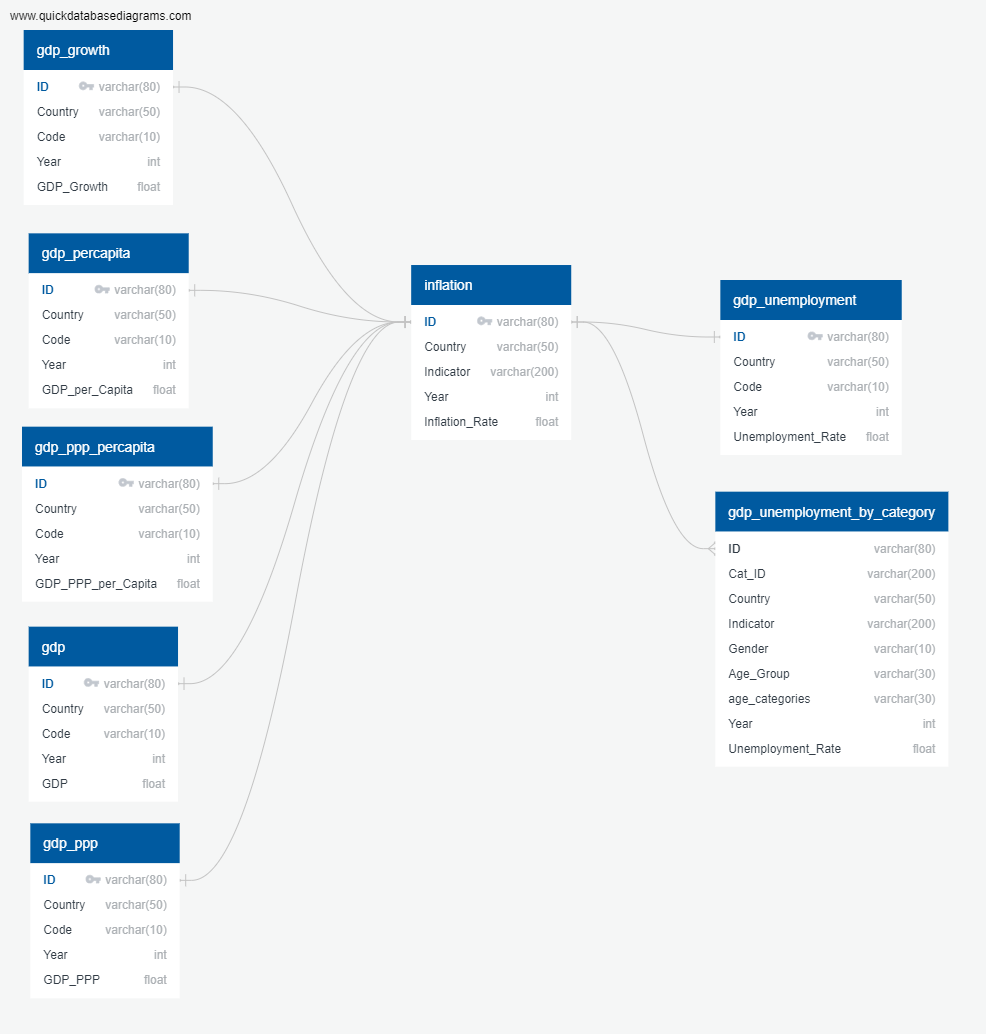

In [53]:
# Load inflation data
inflation_df = pd.read_csv('C:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\Global_Inflation_Trends_Dashboard\\cleaned_data\\inflation.csv')

# Load gdp data
gdp_df = pd.read_csv('C:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\Global_Inflation_Trends_Dashboard\\cleaned_data\\gdp.csv')

In [55]:
# Get a list of IDs in the inflation data
inflation_ids = set(inflation_df['ID'])

# Get a list of IDs in the gdp data
gdp_ids = set(gdp_df['ID'])

# Identify missing IDs
missing_ids_in_gdp = gdp_ids - inflation_ids
missing_ids_in_inflation = inflation_ids - gdp_ids

print(f"Missing IDs in GDP: {missing_ids_in_gdp}")
print(f"Missing IDs in Inflation: {missing_ids_in_inflation}")



Missing IDs in GDP: {'Peru_1962', 'Middle East & North Africa_1973', 'Middle East & North Africa (IDA & IBRD countries)_1971', 'Austria_1968', 'High income_2000', 'Liberia_1960', 'Uruguay_1973', 'Africa Western and Central_2007', 'Chile_1973', 'Azerbaijan_1971', 'Latin America & Caribbean_1993', 'Turks and Caicos Islands_1970', 'French Polynesia_2004', 'Israel_1964', 'French Polynesia_1996', 'Caribbean small states_1966', 'Greenland_1998', 'Guam_2018', 'Panama_1971', 'Burundi_1976', 'Least developed countries: UN classification_2016', 'Heavily indebted poor countries (HIPC)_2005', 'Malaysia_1978', 'Arab World_2005', 'Yemen, Rep._1983', 'South Sudan_1975', 'Not classified_1985', 'Isle of Man_1962', 'Caribbean small states_2007', 'Sierra Leone_1961', 'Austria_1978', 'Middle income_2013', 'Latin America & the Caribbean (IDA & IBRD countries)_1987', 'Other small states_1996', 'Virgin Islands (U.S.)_2020', 'Afghanistan_1961', 'Fragile and conflict affected situations_2003', 'South Asia_2015

In [56]:
# Export missing IDs to CSV files for review
missing_gdp_df = gdp_df[gdp_df['ID'].isin(missing_ids_in_gdp)]
missing_gdp_df.to_csv('C:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\Global_Inflation_Trends_Dashboard\\cleaned_data\\missing_gdp.csv', index=False)

missing_inflation_df = inflation_df[inflation_df['ID'].isin(missing_ids_in_inflation)]
missing_inflation_df.to_csv('C:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\Global_Inflation_Trends_Dashboard\\cleaned_data\\missing_inflation.csv', index=False)
